# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Navy Nurlyn Ajrina
- **Email:** navyajrina@gmail.com
- **ID Dicoding:** navynurlyn

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
- Apa metode pembayaran yang paling sering digunakan customer/ paling populer untuk bertransaksi di E-commerce?
- Produk apa yang paling banyak dan paling sedikit terjual di perusahaan ini?
- Bagaimana demografi pelanggan yang perusahaan miliki berdasarkan City dan State? 
- Bagaimana delivery time memengaruhi review score? (Analisis ini akan melihat korelasi antara skor ulasan produk dan penjualan, apakah produk dengan skor ulasan lebih tinggi lebih sering dibeli)
- Kapan waktu puncak pemesanan oleh pelanggan terjadi? hal ini penting diketahui agar perusahaan dapat memaksimalkan segala sumber daya pada saat waktu puncak
- Bagaimana pengaruh antara harga barang dengan biaya pengiriman barang? apakah product dengan harga mahal memiliki biaya pengiriman yang mahal juga?
- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Dataset yang digunakan dalam proyek akhir ini adalah:
- Order Items: Informasi detail mengenai setiap item yang dipesan, termasuk harga dan biaya pengiriman.
- Order Payments: Informasi mengenai metode pembayaran yang digunakan untuk setiap pesanan, termasuk jumlah cicilan.
- Order Reviews: Ulasan yang diberikan oleh pelanggan terkait produk yang mereka beli, lengkap dengan skor ulasan dan pesan ulasan.
- Orders: Data inti pesanan, mencakup status pesanan, tanggal pembelian, dan waktu pengiriman.
- Products: Detail produk, termasuk ukuran deskripsi, jumlah foto, dan dimensi produk.
- Customers: Data pelanggan dengan informasi lokasi berdasarkan kode pos.

In [2]:
orders_df = pd.read_csv("data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [3]:
order_items_df = pd.read_csv("data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [4]:
order_payments_df = pd.read_csv("data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [5]:
order_reviews_df = pd.read_csv("data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [6]:
customers_df = pd.read_csv("data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
products_df = pd.read_csv("data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [8]:
products_English_df = pd.read_csv("data/product_category_name_translation.csv")
products_English_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
products_df = products_df.merge(
    products_English_df[['product_category_name', 'product_category_name_english']],
    on='product_category_name',
    how='left'
)

In [10]:
products_df.isna().sum()

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

### Assessing Data

#### Menilai Orders_df

In [11]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [12]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [13]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
# Periksa Prameter Statistik
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight hasil penilaian orders_df:**
- Terdapat Missing Value pada order_approved_at, order_delivered_carrier_date, order_delivered_customer_date (sehingga perlu ditangani di Data Cleaning)
- Beberapa kolom dengan informasi tanggal (order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date) memiliki tipe data object, padahal seharusnya memiliki tipe data datetime sehingga perlu diubah nantinya.
- Tidak terdapat data duplikat (karena jumlah duplikasi = 0).

#### Menilai Order_items_df

In [15]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [16]:
# Mengecek jumlah Missing Value
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [17]:
# Mengecek jumlah data duplikat
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
# Periksa Prameter Statistik
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight hasil penilaian order_items_df:**
- Tidak terdapat missing value dan tipe data masing masing kolom sudah sesuai
- Tidak terdapat data duplikat (karena jumlah duplikasi = 0).
- Namun dari hasil describe() ada beberapa hal yang perlu diperhatikan
- Nilai max dan min price sedikit aneh sehingga harga dengan nilai ekstrem, baik yang sangat rendah maupun sangat tinggi, perlu diperiksa untuk memastikan tidak ada kesalahan input data.
- Nilai maksimum dari order_item_id adalah 21 (ini perlu dicek apakah kesalahan input data atau memang ada)

#### Menilai Order_items_df

In [18]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [19]:
# Mengecek jumlah Missing Value
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [20]:
# Mengecek jumlah data duplikat
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
# Periksa Prameter Statistik
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight hasil penilaian order_items_df:**
- Tidak terdapat missing value dan tipe data masing masing kolom sudah sesuai
- Tidak terdapat data duplikat (karena jumlah duplikasi = 0).
- Namun dari hasil describe() ada beberapa hal yang perlu diperhatikan
- Nilai max dan min price sedikit aneh sehingga harga dengan nilai ekstrem, baik yang sangat rendah maupun sangat tinggi, perlu diperiksa untuk memastikan tidak ada kesalahan input data.
- Nilai maksimum dari order_item_id adalah 21 (ini perlu dicek apakah kesalahan input data atau memang ada)

#### Menilai Order_payments_df

In [21]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [22]:
# Mengecek jumlah Missing Value
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [23]:
# Mengecek jumlah data duplikat
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())
# Periksa Prameter Statistik
order_payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight hasil penilaian order_payments_df:**
- Tidak terdapat missing value dan tipe data masing masing kolom sudah sesuai
- Tidak terdapat data duplikat (karena jumlah duplikasi = 0).<br>
**Namun dari hasil describe() ada beberapa hal yang perlu diperhatikan**
- Perlu meneliti lebih lanjut data dengan payment_sequential > 10, payment_installments = 0, dan payment_value = 0 atau sangat tinggi.
Jika ditemukan anomali atau kesalahan input, maka perlu dilakukan penanganan seperti menghapus atau mengoreksi data tersebut.

#### Menilai Order_reviews_df

In [24]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [25]:
# Mengecek jumlah Missing Value
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [26]:
# Mengecek jumlah data duplikat
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
# Periksa Prameter Statistik
order_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Insight hasil penilaian order_reviews_df:**
- Terdapat missing value pada review_comment_title (87656) dan review_comment_message (58247). Missing value ini cukup banyak bahkan hingga 50% review_comment_message kosong. Namun judul ulasan (review_comment_title) dan pesan ulasan (review_comment_message) bersifat opsional karena tidak semua pengguna memberikan judul dan pesan pada ulasan mereka. Selain itu analisis data ini akan fokus pada review_score, sehingga missing value tersebut tidak menjadi masalah dalam project ini
- Tipe data masing masing kolom sudah sesuai
- Tidak terdapat data duplikat (karena jumlah duplikasi = 0)
- order_reviews_df sudah baik

#### Menilai customers_df

In [27]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [28]:
# Mengecek jumlah Missing Value
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [29]:
# Mengecek jumlah data duplikat
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

# Periksa Prameter Statistik
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight hasil penilaian customers_df:**
- Tidak terdapat missing value pada customers_df
- Nilai min adalah 1003 dan max adalah 99990. Secara umum, kode pos di Brazil (yang merupakan asal dataset ini) terdiri dari lima digit. Kode pos dengan empat digit (misalnya 1003) terlihat mencurigakan dan perlu diperiksa lebih lanjut. Bisa jadi itu adalah kesalahan input atau memang format kode pos yang lebih pendek di wilayah tertentu.
- Tipe data masing-masing kolom sudah sesuai
- Tidak terdapat data duplikat (karena jumlah duplikasi = 0)

#### Menilai products_df

In [30]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32341 non-null  object 
 2   product_name_lenght            32341 non-null  float64
 3   product_description_lenght     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.5+ MB


In [31]:
products_df.isna().sum()

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

In [32]:
# Mengecek jumlah data duplikat
print("Jumlah duplikasi: ", products_df.duplicated().sum())

# Periksa Prameter Statistik
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight hasil penilaian products_df:**
- Terdapat missing value pada semua kolom kecuali kolom product_id
- Tipe data masing-masing kolom sudah sesuai
- Tidak terdapat data duplikat (karena jumlah duplikasi = 0)
- Nilai minimum untuk berat produk (product_weight_g) adalah 0.000000, yang tentunya tidak masuk akal. Sebuah produk tidak mungkin memiliki berat nol, sehingga ini mungkin merupakan kesalahan data yang perlu diperiksa lebih lanjut. Sehingga perlu menghapus atau mengganti nilai 0 dengan nilai yang lebih masuk akal (seperti median atau rata-rata dari data valid).

### Cleaning Data

#### Cleaning orders_df

##### Mengubah tipe data beberapa kolom menjadi DateTime 

In [33]:
# Mengubah kolom-kolom yang berisi tanggal menjadi tipe datetime
date_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
# Melakukan konversi untuk setiap kolom
for column in date_columns:
    orders_df[column] = pd.to_datetime(orders_df[column], errors='coerce')

# Mengecek tipe data setelah konversi
print(orders_df[date_columns].dtypes)

order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object


Berdasarkan hasil output di atas maka dapat diketahui jika kolom-kolom yang sebelumnya bertipe data object namun berisi data tanggal sudah berhasil diubah menjadi tipe data DateTime

##### Mengatasi Missing Value pada order_approved_at, order_delivered_carrier_date, order_delivered_customer_date 

Untuk mengatasi missing values di orders_df, saya mengambil pendekatan yang berbeda tergantung pada kolom dan konteksnya.
- Kolom order_approved_at
Missing value di kolom ini berarti order belum disetujui. Namun, order yang tidak memiliki nilai order_approved_at tidak bisa dianggap valid, karena approval adalah bagian penting dari proses pesanan. Solusinya adalah menghapus baris yang tidak memiliki order_approved_at, karena order yang belum disetujui dianggap tidak valid.
- Mssing value di kolom order_delivered_carrier_date akan di drop
- Missing value di kolom order_delivered_customer_date, artinya produk belum diterima oleh pelanggan atau pesanan dibatalkan. Maka missing value pada kolom ini juga akan dihapus.

In [34]:
# Melihat kategori unik di kolom 'order_status'
unique_orderstatus = orders_df['order_status'].unique()
print(unique_orderstatus)

['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']


In [35]:
# Menghapus baris yang tidak memiliki 'order_approved_at' (pesanan yang belum disetujui dianggap tidak valid)
orders_df = orders_df.dropna(subset=['order_approved_at'])
# Menghapus baris yang tidak memiliki 'order_delivered_carrier_date'
orders_df = orders_df.dropna(subset=['order_delivered_carrier_date'])
# Menghapus baris yang tidak memiliki 'order_delivered_customer_date'
orders_df = orders_df.dropna(subset=['order_delivered_customer_date'])
orders_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [36]:
orders_df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96461,96461,96461,96461,96461
mean,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544
min,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
25%,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00
50%,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00
75%,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00
max,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


**Insight cleaning data orders_df** <br>
Berdasarkan hasil di atas maka dapat diketahui jika semua kolom yang menyimpan waktu DateTime sudah diubah tipe datanya menjadi DateTime, dan semua missing value pada orders_df sudah berhasil ditangani sehingga orders_df sudah bersih dan siap di proses

#### Cleaning order_items_df

##### Membersihkan kolom price
Nilai max dan min price sedikit aneh sehingga harga dengan nilai ekstrem, baik yang sangat rendah maupun sangat tinggi, perlu diperiksa untuk memastikan tidak ada kesalahan input data. 

In [37]:
# Menampilkan baris dengan harga ekstrem sangat rendah
low_price_items = order_items_df[order_items_df['price'] < 1]
print(low_price_items)

# Menampilkan baris dengan harga ekstrem sangat tinggi
high_price_items = order_items_df[order_items_df['price'] > 4000]
print(high_price_items)

                               order_id  order_item_id  \
27652  3ee6513ae7ea23bdfab5b9ab60bffcb5              1   
48625  6e864b3f0ec71031117ad4cf46b7f2a1              1   
87081  c5bdd8ef3c0ec420232e668302179113              2   

                             product_id                         seller_id  \
27652  8a3254bee785a526d548a81a9bc3c9be  96804ea39d96eb908e7c3afdb671bb9e   
48625  8a3254bee785a526d548a81a9bc3c9be  96804ea39d96eb908e7c3afdb671bb9e   
87081  8a3254bee785a526d548a81a9bc3c9be  96804ea39d96eb908e7c3afdb671bb9e   

       shipping_limit_date  price  freight_value  
27652  2018-05-04 03:55:26   0.85          18.23  
48625  2018-05-02 20:30:34   0.85          18.23  
87081  2018-05-07 02:55:22   0.85          22.30  
                                order_id  order_item_id  \
3556    0812eb902a67711a1cb742b3cdaa65ae              1   
11249   199af31afc78c699f0dbf71fb178d4d4              1   
29193   426a9742b533fc6fed17d1fd6d143d7e              1   
45843   68101694e5

Berdasarkan pengecekan di atas, sepertinya bukan merupakan inaccurate value/human error sehingga tidak perlu dilakukan tindakan pembersihan lainnya

##### Mengecek Inaccurate Value kolom order_items_id
Sebagai awal, kita perlu melihat data baris data yang diperkirakan mengandung inaccurate value tersebut (baris dengan nilai order_item_id maksimum). Hal ini dilakukan menggunakan teknik filter

In [38]:
# Menampilkan baris dengan order_item_id yang melebihi jumlah yang wajar (misalnya > 20)
large_order_items = order_items_df[order_items_df['order_item_id'] > 18]
print(large_order_items)

                               order_id  order_item_id  \
11950  1b15974a0141d54e36626dca3fdc731a             19   
11951  1b15974a0141d54e36626dca3fdc731a             20   
57315  8272b63d03f5f79c56e9e4120aec44ef             19   
57316  8272b63d03f5f79c56e9e4120aec44ef             20   
57317  8272b63d03f5f79c56e9e4120aec44ef             21   
75121  ab14fdcfbe524636d65ee38360e22ce8             19   
75122  ab14fdcfbe524636d65ee38360e22ce8             20   

                             product_id                         seller_id  \
11950  ee3d532c8a438679776d222e997606b3  8e6d7754bc7e0f22c96d255ebda59eba   
11951  ee3d532c8a438679776d222e997606b3  8e6d7754bc7e0f22c96d255ebda59eba   
57315  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57316  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57317  79ce45dbc2ea29b22b5a261bbb7b7ee7  2709af9587499e95e803a6498a5a56e9   
75121  9571759451b1d780ee7c15012ea109d4  ce27a3cc3c8cc1ea79d11e561e9bebb6

Berdasarkan hasil di atas, saya dapat mengasumsikan jika kolom order_item_id tidak memiliki inaccurate value karena ternyata banyak data yang > 15 (wajar jika seseorang membeli lebih dari 15 item product).

#### Cleaning order_payments_df
Pembayaran dengan cicilan 0 tidak wajar, sehingga bisa diperbaiki dengan mengganti nilai payment_installment dengan mean/rata-rata.

In [39]:
# Cleaning payment_installment = 0 dengan mean
# Menghitung mean dari payment_installments
mean_installments = order_payments_df['payment_installments'].mean()

# Mengganti nilai payment_installments yang bernilai 0 dengan mean yang sudah dihitung
order_payments_df['payment_installments'] = order_payments_df['payment_installments'].replace(0, mean_installments)

# Cek hasil untuk memastikan nilai 0 sudah diganti
print(order_payments_df['payment_installments'].unique())

[ 8.          1.          2.          3.          6.          5.
  4.         10.          7.         12.          9.         13.
 15.         24.         11.         18.         14.         20.
 21.         17.         22.          2.85334886 16.         23.        ]


#### Cleaning order_reviews_df

Berdasarkan assessing data sebelumnya, order_reviews_df tidak memiliki data duplikat, tipe data sudah sesuai, namun memiliki beberapa  missing value pada kolom review_comment_title (87656) dan review_comment_message (58247). Namun judul ulasan (review_comment_title) dan pesan ulasan (review_comment_message) bersifat opsional karena tidak semua pengguna memberikan judul dan pesan pada ulasan mereka. Selain itu analisis data ini akan fokus pada review_score, sehingga missing value tersebut tidak menjadi masalah dalam project ini.

#### Cleaning customers_df

##### Mengatasi kode pos yang kurang dari 5 digit
Secara umum, kode pos di Brazil (yang merupakan asal dataset ini) terdiri dari lima digit. Kode pos dengan empat digit (misalnya 1003) terlihat mencurigakan dan perlu diperiksa lebih lanjut. Bisa jadi itu adalah kesalahan input atau memang format kode pos yang lebih pendek di wilayah tertentu.

In [40]:
# Memeriksa panjang dari customer_zip_code_prefix yang kurang dari 5 digit
invalid_zip_codes = customers_df[customers_df['customer_zip_code_prefix'].astype(str).str.len() < 5]

# Menampilkan hasil
print(invalid_zip_codes)

                            customer_id                customer_unique_id  \
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
6      fd826e7cf63160e536e0908c76c3f441  addec96d2e059c80c30fe6871d30d177   
13     eabebad39a88bb6f5b52376faec28612  295c05e81917928d76245e842748184d   
...                                 ...                               ...   
99430  27b9b32173455ef32167540451749d0b  277490f0d435b602fe4475d4b89e9181   
99434  f5a0b560f9e9427792a88bec97710212  b3e53d18a997f27a3ffd16da497eaf58   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  
1  

Berdasarkan hasil pencarian didapatkan bahwa kode pos diatas memang valid, sehingga tidak diperlukan data cleaning lebih lanjut pada customers_df

#### Cleaning products_df

##### Menangani missing value product_category_name
solusi: mengganti missing values dengan kategori yang paling sering muncul (mode)

In [41]:
# Mengisi missing values pada product_category_name dengan modus
if products_df['product_category_name'].isnull().any():
    # Mengisi dengan modus
    mode_value = products_df['product_category_name'].mode()[0]
    products_df['product_category_name'] = products_df['product_category_name'].fillna(mode_value)

# Mengisi missing values pada product_category_name_english dengan modus
if products_df['product_category_name_english'].isnull().any():
    # Mengisi dengan modus
    mode_value_english = products_df['product_category_name_english'].mode()[0]
    products_df['product_category_name_english'] = products_df['product_category_name_english'].fillna(mode_value_english)

##### Menangani missing value product_name_length dan product_description_length
solusi: mengganti missing values ini dengan 0, karena jika tidak ada nama atau deskripsi, maka panjangnya bisa dianggap 0.

In [42]:
# Mengisi missing values pada product_name_length dan product_description_length
products_df.loc[products_df['product_name_lenght'].isnull(), 'product_name_lenght'] = 0
products_df.loc[products_df['product_description_lenght'].isnull(), 'product_description_lenght'] = 0

##### Menangani missing value product_photos_qty
solusi: mengganti missing values ini dengan 0, karena jika tidak ada foto, jumlah foto juga dianggap 0.

In [43]:
products_df.loc[products_df['product_photos_qty'].isnull(), 'product_photos_qty'] = 0

##### Menangani missing value product_weight_g, product_length_cm, product_height_cm, dan product_width_cm
solusi: mengecek terlebih dahulu data yang memiliki missing value di kolom kolom ini, karena hanya 2 missing value pada kolom-kolom ini, maka saya mempertimbangkan untuk menghapus data tersebut

In [44]:
products_df[products_df.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN,baby
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,0.0,0.0,0.0,NaN,NaN,NaN,NaN,bed_bath_table


In [45]:
products_df = products_df.dropna(subset=['product_weight_g'])
products_df.isnull().sum()

product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

Berdasarkan hasil di atas maka dapat diketahui bahwa semua missing value di products_df sudah berhasil ditangani dan dibersihkan

### Penjelasan Data Wrangling

Dalam tahap ini saya melakukan data gathering beberapa data set diantaranya: orders_df, order_items_df, order_payments_df, order_reviews_df, customers_df, products_df. 
Data Assessing: Pada tahap ini saya menemukan beberapa hal yang perlu ditangani pada saat pembersihan data, terdapat beberapa dataframe yang memiliki nilai missing value, nilai duplikat, dan juga innacurate value
Data cleaning: pada tahap ini saya melakukan beberapa hal diantaranya:
- orders_df: menangani missing value pada beberapa kolom dan mengubah tipe data beberapa kolom menjadi datetime.
- order_items_df: hanya melakukan pengecekan terhadap dugaan inaccurate value
- order_payments_df:Pembayaran dengan cicilan 0 tidak wajar, sehingga saya mengganti nilai payment_installment=0 dengan mean/rata-rata.
- order_reviews_df: terdapat missing value pada kolom review_comment_title (87656) dan review_comment_message (58247). Namun judul ulasan & pesan ulasan (review_comment_message) bersifat opsional karena tidak semua pengguna memberikan judul dan pesan pada ulasan mereka. Selain itu analisis data ini akan fokus pada review_score, sehingga missing value tersebut tidak dihiraukan dalam project ini.
- customers_df: hanya melakukan pengecekan terhadap dugaan adanya inaccurate value
- products_df: mengganti missing values product_category_name dengan kategori yang paling sering muncul (mode), mengganti missing value product_name_length dan product_description_length dengan 0, mengganti missing value product_photos_qty dengan 0, mendrop/menghapus missing value product_weight_g, product_length_cm, product_height_cm, dan product_width_cm. 

## Exploratory Data Analysis (EDA)

### Explore Orders_df

#### Membuat kolom delivery_time pada orders_df

Disini saya ingin mengetahui waktu pengiriman setiap pesanan. Untuk melakukannya, saya perlu menghitung selisih antar order_delivered_customer_date dan order_purchase_timestamp serta menyimpannya sebagai delivery_time. Selanjutnya, menggunakan method apply() untuk melakukan sebuah operasi terhadap setiap elemen dalam sebuah kolom DataFrame. Operasi yang akan kita lakukan ialah menghitung jumlah detik dari delivery_time menggunakan method total_seconds(). Nilai tersebut selanjutnya diubah ke dalam satuan hari (dibagi 86400) dan diambil bilangan bulatnya saja.

In [46]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,25.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0


In [47]:
orders_df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,96461,96461,96461,96461,96461,96461.000000
mean,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544,12.517007
min,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000
25%,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00,7.000000
50%,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00,10.000000
75%,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00,16.000000
max,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,210.000000
std,NaN,NaN,NaN,NaN,NaN,9.550354


#### Melihat distribusi status pesanan

In [48]:
print(orders_df.groupby(by="order_status").order_id.count())

order_status
canceled         6
delivered    96455
Name: order_id, dtype: int64


Berdasarkan output diatas maka diketahui jika terdapat 6 pesanan yang di cancel dan terdapat 96455 data yang sudah terkirim

#### Melihat distribusi pesanan berdasarkan Hari dan Jam

In [49]:
orders_df['order_purchase_timestamp'].dt.day_name().value_counts()

order_purchase_timestamp
Monday       15703
Tuesday      15502
Wednesday    15074
Thursday     14320
Friday       13681
Sunday       11633
Saturday     10548
Name: count, dtype: int64

In [50]:
orders_df['order_purchase_timestamp'].dt.hour.value_counts().sort_index()

order_purchase_timestamp
0     2322
1     1132
2      496
3      259
4      203
5      182
6      477
7     1199
8     2906
9     4647
10    5978
11    6384
12    5800
13    6307
14    6383
15    6248
16    6474
17    5959
18    5585
19    5802
20    6008
21    6040
22    5656
23    4014
Name: count, dtype: int64

**Insight**
- Rata-rata delivery_time adalah 12 hari, dengan waktu pengiriman minimal 1 hari dan waktu pengiriman paling lama adalah 210 hari
- Terdapat 6 pesanan yang di cancel dan terdapat 96455 data yang sudah terkirim
- Rata-rata delivery time adalah 12 hari, dengan delivery time tercepat adalah 1 hari 
- Berdasarkan output di atas maka dapat diketahui jika pesanan paling banyak di lakukan di hari Senin dan hari Selasa. Selain itu pesanan paling banyak dilakukan di sekitaran jam 11.00 hingga jam 16.00 ini menandakan bahwa banyak customer membeli produk di waktu siang hingga sore hari.

### Explore Order_items_df

#### Menghitung jumlah item per pesanan 

In [51]:
# Menghitung jumlah item per pesanan dan mengurutkannya dari yang paling banyak
item_per_order = order_items_df.groupby('order_id')['order_item_id'].count().sort_values(ascending=False)

# Menampilkan hasil
item_per_order

order_id
8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
fff1e3e76b816bfe8ef16678cc53c643     1
fff2cdc825f9fc0ba3c04227cfa02303     1
fff2e9e3aa8644e19710216b4ef53ab2     1
fff3983dfa3c5a0d752d8d17baa406a0     1
fffe41c64501cc87c801fd61db3f6244     1
Name: order_item_id, Length: 98666, dtype: int64

In [52]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
- Dalam sebuah order, customer paling banyak membeli 21 product dan paling sedikit adalah membeli 1 product
- Dapat diketahui jika harga barang berkisar antara 0.85 hingga 6735 dolar
- Diketahui jika freight_value berkisar antara 0 hingga 409 dolar. Freight_value yang bernilai 0 dapat disebabkan oleh voucher maupun gratis ongkir

### Explore Order_payments_df

In [53]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853404,154.100380
std,0.706584,2.687022,217.494064
min,1.000000,1.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**
- Rata-rata jumlah cicilan (payment Installments) adalah 2.85, menunjukkan bahwa sebagian besar pelanggan memilih cicilan sekitar 3 kali pembayaran.
- Nilai minimum cicilan adalah 1, yang berarti ada pelanggan yang membayar sekaligus tanpa cicilan, dan maksimum adalah 24, yang menunjukkan beberapa pelanggan melakukan cicilan sebanyak 24 kali.
- Nilai minimum pembayaran adalah 0, mungkin menunjukkan adanya transaksi yang gagal atau dikembalikan (status = canceled).

### Explore Order_reviews_df

In [54]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Insigth**
- Rata-rata skor ulasan adalah 4.09, yang menunjukkan bahwa mayoritas ulasan cenderung positif.
- Sebaran skor ulasan, Standar deviasi 1.35 menunjukkan adanya variasi dalam ulasan pelanggan. Meskipun rata-rata skor cukup tinggi, ada beberapa ulasan dengan skor yang lebih rendah.
- Skor minimum adalah 1, menunjukkan bahwa ada pelanggan yang memberikan ulasan sangat buruk. Skor maksimum adalah 5, yang berarti ulasan tertinggi juga tercatat.

### Explore customers_df

In [55]:
# Menghitung total pelanggan berdasarkan negara bagian
state_distribution = customers_df.groupby('customer_state').size().reset_index(name='jumlah_pelanggan')

# Menampilkan hasil distribusi
print(state_distribution)

   customer_state  jumlah_pelanggan
0              AC                81
1              AL               413
2              AM               148
3              AP                68
4              BA              3380
5              CE              1336
6              DF              2140
7              ES              2033
8              GO              2020
9              MA               747
10             MG             11635
11             MS               715
12             MT               907
13             PA               975
14             PB               536
15             PE              1652
16             PI               495
17             PR              5045
18             RJ             12852
19             RN               485
20             RO               253
21             RR                46
22             RS              5466
23             SC              3637
24             SE               350
25             SP             41746
26             TO           

**Insight:**
Berdasarkan data diatas maka dapat diketahui jika negara bagian yang memiliki jumlah pelanggan terbanyak adalah SP (São Paulo), RJ (Rio de Janeiro), MG (Minas Gerais), RS (Rio Grande do Sul), dan PR (Paraná)

### Explore products_df

In [56]:
products_df.groupby(by="product_category_name_english").agg({
    "product_id": "nunique"
}).sort_values(by="product_id", ascending=False)

,product_id
product_category_name_english,
bed_bath_table,3651
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
...,...
tablets_printing_image,9
home_comfort_2,5
fashion_childrens_clothes,5


**Insight:**
- Kategori product yang paling laris/paling banyak terjual adalah bed_bath_table, sports_leisure, furniture_decor, health_beauty, dan housewares
- Kategori product yang paling sediki terjual adalah cds_dvds_musicals, security_and_services, fashion_childrens_clothes, home_comfort_2, dan tablets_printing_image

### Menggabungkan semua dataframe menjadi all_data_df

all_data_df adalah hasil penggabungan beberapa data frame. all_data_df akan digunakan dalam tahap selanjutnya yaitu tahap visualisasi dan tahap analisis lebih dalam untuk menjawab pertanyaan bisnis yang telah disusun sebelumnya

In [57]:
# Menggabungkan orders_df dengan order_items_df
orders_orderitem_df = orders_df.merge(order_items_df, on='order_id', how='left')

# Menggabungkan hasil dengan order_payments_df
orders_orderitem_payment_df = orders_orderitem_df.merge(order_payments_df, on='order_id', how='left')

# Menggabungkan hasil dengan order_reviews_df
orders_orderitem_payment_review_df = orders_orderitem_payment_df.merge(order_reviews_df, on='order_id', how='left')

# Menggabungkan hasil dengan products_df berdasarkan product_id
orders_orderitem_payment_review_product_df = orders_orderitem_payment_review_df.merge(products_df, on='product_id', how='left')

# Menggabungkan hasil dengan customers_df berdasarkan customer_id
all_data_df = orders_orderitem_payment_review_product_df.merge(customers_df, on='customer_id', how='left')

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?

In [58]:
# Membuat kolom baru 'month' berdasarkan 'order_purchase_timestamp' dengan menggunakan .loc untuk menghindari warning
all_data_df.loc[:, 'month'] = all_data_df['order_purchase_timestamp'].dt.to_period('M')

# Mengelompokkan data berdasarkan 'month', menghitung jumlah order, dan menghitung total revenue
monthly_sales = all_data_df.groupby('month').agg(
    order_count=('order_id', 'nunique'),  # Menghitung jumlah order unik per bulan
    total_revenue=('payment_value', 'sum')  # Menghitung total revenue per bulan
).reset_index()

# Mengonversi 'month' kembali menjadi format datetime untuk mempermudah plotting
monthly_sales['month'] = monthly_sales['month'].dt.to_timestamp()

# Menampilkan DataFrame hasil pengelompokan
print(monthly_sales.head(10))

       month  order_count  total_revenue
0 2016-09-01            1           0.00
1 2016-10-01          270       63030.53
2 2016-12-01            1          19.62
3 2017-01-01          748      178167.17
4 2017-02-01         1641      325962.15
5 2017-03-01         2546      508767.44
6 2017-04-01         2303      457050.31
7 2017-05-01         3545      706848.90
8 2017-06-01         3135      590223.90
9 2017-07-01         3872      720446.68


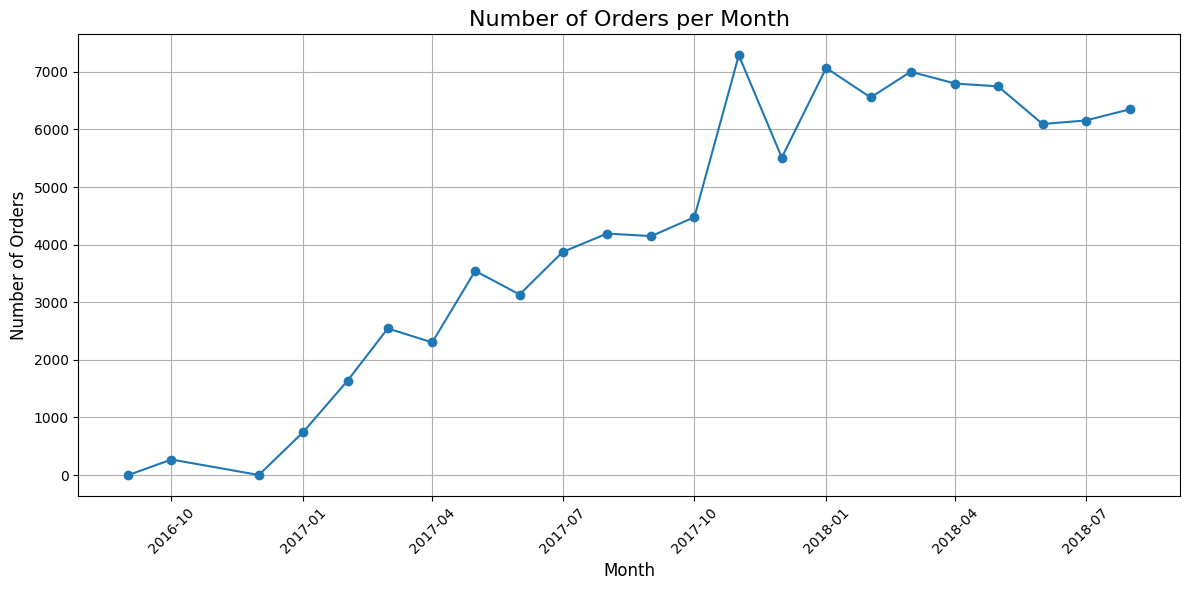

In [59]:
# Visualisasi Jumlah penjualan bulanan
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['month'], monthly_sales['order_count'], color='tab:blue', marker='o')
plt.title('Number of Orders per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Pertumbuhan Jumlah Pesanan**
- Terdapat peningkatan pesanan yang konsisten dari akhir 2016 hingga pertengahan 2017. Ini menunjukkan bahwa bisnis mengalami pertumbuhan signifikan selama periode tersebut.
- Setelah April 2017, jumlah pesanan mulai meningkat drastis, mencapai puncaknya pada bulan sekitar Oktober 2017. <br>
**Fluktuasi di Akhir 2017**
- Terlihat adanya lonjakan pesanan yang signifikan pada bulan Oktober 2017. Namun, setelah mencapai puncaknya, jumlah pesanan menurun tajam pada bulan-bulan setelahnya, tetapi tidak sampai ke level yang rendah.
 <br>**Stabilitas di 2018**
- Pada awal 2018, jumlah pesanan cenderung lebih stabil. Meskipun ada sedikit penurunan, volume pesanan tetap tinggi dibandingkan dengan periode sebelumnya (2016 awal hingga pertengahan 2017).
- Pada pertengahan 2018, jumlah pesanan menunjukkan pola stabil, meski dengan sedikit fluktuasi bulanan, namun tanpa perubahan signifikan seperti yang terjadi pada tahun 2017.

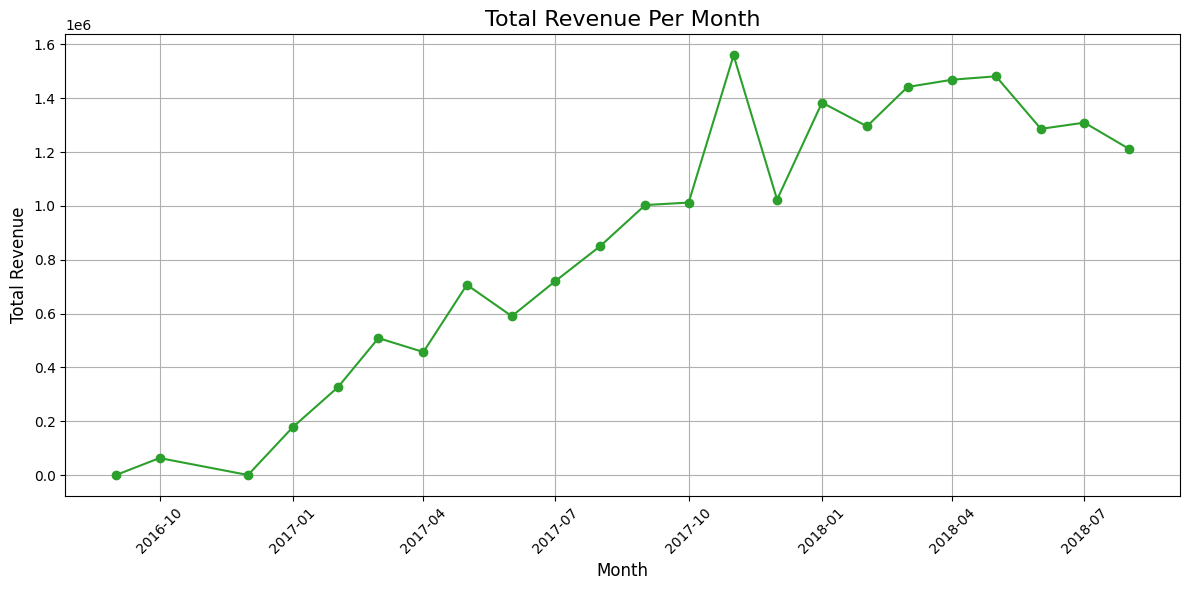

In [60]:
# Visualisasi Revenue per bulan
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['month'], monthly_sales['total_revenue'], color='tab:green', marker='o')
plt.title('Total Revenue Per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Pertumbuhan Pendapatan**
Terjadi peningkatan total pendapatan yang signifikan dari akhir 2016 hingga pertengahan 2017, dengan tren yang mirip seperti jumlah pesanan. Hal ini mengindikasikan bahwa baik volume pesanan maupun pendapatan tumbuh bersamaan.
Puncak pertama pertumbuhan pendapatan terjadi di bulan Oktober 2017.

**Fluktuasi di Akhir 2017**
Sama seperti grafik jumlah pesanan, terdapat fluktuasi yang signifikan di akhir 2017. Pendapatan mencapai puncak sekitar bulan Oktober 2017, diikuti dengan penurunan yang tajam setelahnya.

**Stabilitas di 2018**
Dari awal 2018 hingga pertengahan 2018, pendapatan relatif stabil di angka sekitar 1 juta hingga 1,4 juta. Ini mencerminkan kematangan bisnis, meskipun terjadi sedikit penurunan pada bulan-bulan tertentu di pertengahan 2018.

Pertumbuhan pendapatan selaras dengan pertumbuhan jumlah pesanan, menunjukkan bahwa harga atau nilai transaksi per pesanan tidak banyak berubah secara signifikan, dan keduanya cenderung sejalan.
Pendapatan stabil di sekitar angka yang cukup tinggi pada 2018, tetapi ada tanda-tanda penurunan di akhir grafik yang mungkin mengindikasikan tantangan eksternal seperti perubahan pasar yang perlu diantisipasi kedepannya.

### Pertanyaan 2: Berapa jumlah order dari masing-masing metode pembayaran?

In [61]:
# Menghitung jumlah dari masing-masing payment type
payment_type_counts = all_data_df['payment_type'].value_counts()

# Menampilkan hasil
print(payment_type_counts)

payment_type
credit_card    85371
boleto         22490
voucher         6181
debit_card      1661
Name: count, dtype: int64


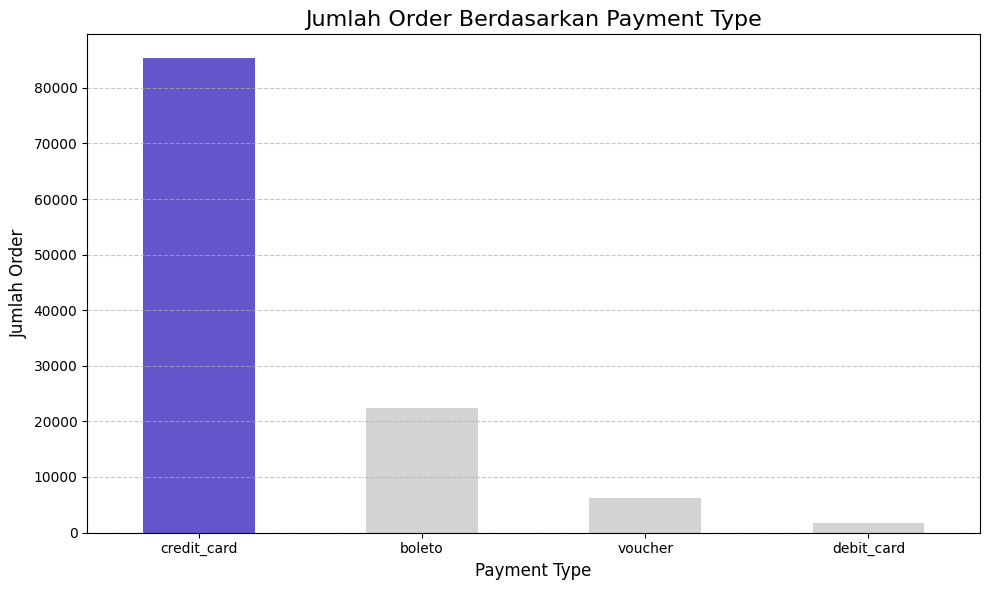

In [62]:
# Menentukan warna berdasarkan nilai
colors = ['#6256CA' if count == payment_type_counts.max() else 'lightgray' for count in payment_type_counts]

# Membuat visualisasi dengan bar chart
plt.figure(figsize=(10, 6))
payment_type_counts.plot(kind='bar', color=colors)

# Memberikan judul dan label sumbu
plt.title('Jumlah Order Berdasarkan Payment Type', fontsize=16)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Jumlah Order', fontsize=12)

# Menambahkan grid untuk memudahkan pembacaan
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.xticks(fontsize=10, rotation=0)  # Memutar label x-axis agar lebih mudah dibaca
plt.tight_layout()
plt.show()

Dari hasil visualisasi mengenai Payment Type, beberapa insight penting yang bisa didapatkan adalah:
- Dominasi Credit Card.
Credit card menjadi metode pembayaran yang paling populer. Ini menunjukkan bahwa mayoritas pelanggan merasa nyaman menggunakan kartu kredit untuk transaksi mereka. Selain itu, ini bisa mengindikasikan bahwa banyak pelanggan yang memiliki akses ke kredit, menunjukkan penetrasi layanan perbankan modern di pasar ini.
- Boleto Sebagai Metode Pembayaran Kedua Terpopuler.
Meskipun berbasis offline, tetap berada di urutan kedua dalam hal jumlah transaksi. Hal ini menandakan bahwa sebagian besar pelanggan di Brasil masih lebih suka melakukan pembayaran secara offline atau menggunakan metode yang tidak memerlukan kartu bank. Ini bisa juga mencerminkan adanya segmen masyarakat yang belum terlayani sepenuhnya oleh perbankan digital, atau mereka yang lebih nyaman melakukan transaksi tunai.

- Penggunaan Voucher.
Voucher berada di posisi ketiga, yang menunjukkan bahwa ada program atau promosi yang berhasil menarik pelanggan untuk menggunakan voucher dalam pembayaran. Ini bisa menjadi sinyal bahwa strategi diskon, cashback, atau reward voucher cukup efektif dalam memotivasi pembelian.

### Pertanyaan 3: Produk apa yang paling banyak dan paling sedikit terjual di perusahaan ini?

In [63]:
# Menghitung jumlah penjualan per kategori produk
product_sales_counts = all_data_df['product_category_name_english'].value_counts()

# Produk yang paling banyak terjual (top 10)
top_10_products = product_sales_counts.head(10)

# Produk yang paling sedikit terjual (bottom 10)
bottom_10_products = product_sales_counts.tail(10)

# Menampilkan hasil
print("Top 10 Products:\n", top_10_products)
print("Bottom 10 Products:\n", bottom_10_products)

Top 10 Products:
 product_category_name_english
bed_bath_table           13454
health_beauty             9818
sports_leisure            8789
furniture_decor           8639
computers_accessories     7962
housewares                7196
watches_gifts             6075
telephony                 4605
garden_tools              4479
auto                      4301
Name: count, dtype: int64
Bottom 10 Products:
 product_category_name_english
furniture_mattress_and_upholstery    40
diapers_and_hygiene                  37
flowers                              33
home_comfort_2                       31
fashion_sport                        30
arts_and_craftmanship                24
la_cuisine                           16
cds_dvds_musicals                    14
fashion_childrens_clothes             7
security_and_services                 2
Name: count, dtype: int64


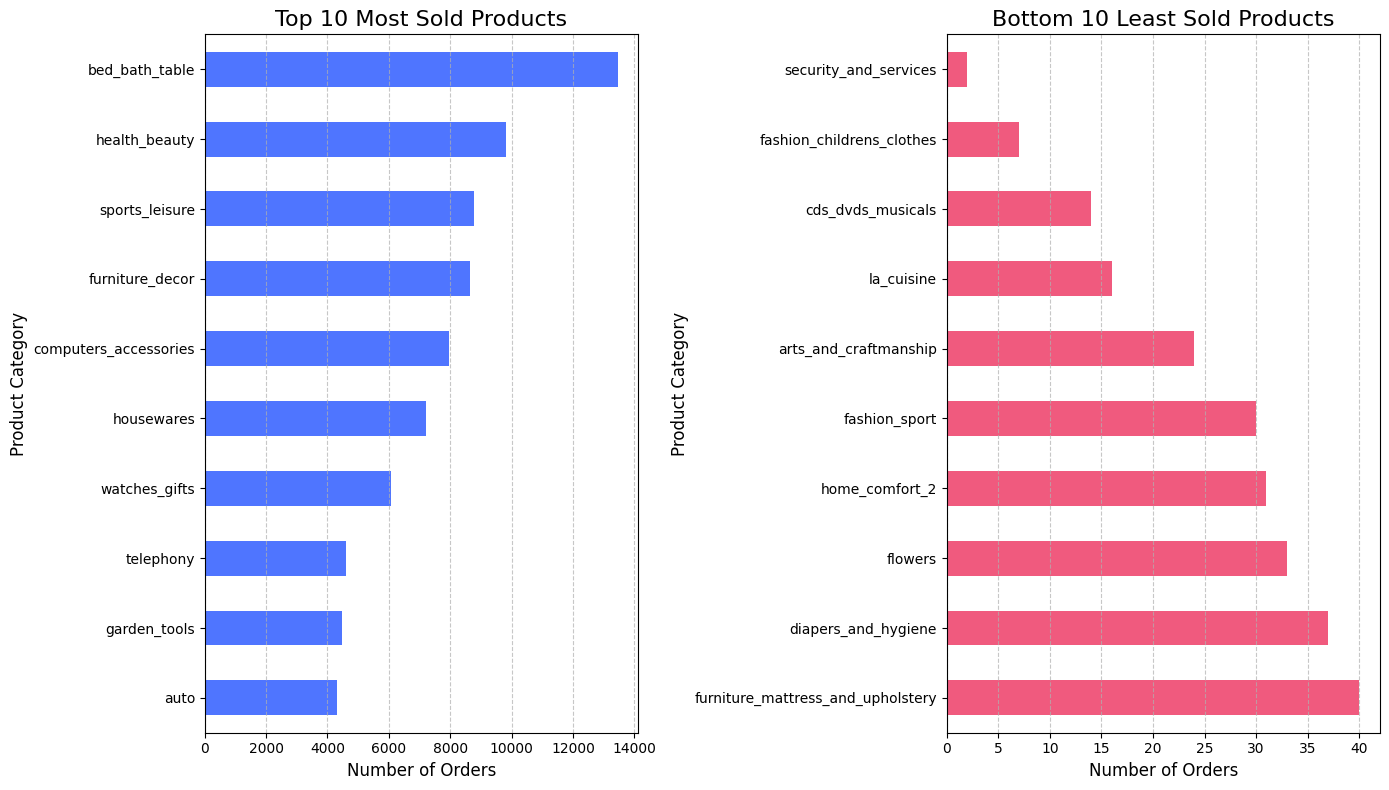

In [64]:
# Membuat subplots dengan dua kolom (2 grafik berdampingan)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

# Plot untuk 10 produk yang paling laku di sebelah kiri (horizontal bar chart)
top_10_products.sort_values(ascending=True).plot(kind='barh', ax=axes[0], color='#4F75FF')
axes[0].set_title('Top 10 Most Sold Products', fontsize=16)
axes[0].set_xlabel('Number of Orders', fontsize=12)
axes[0].set_ylabel('Product Category', fontsize=12)
axes[0].grid(axis='x', linestyle='--', alpha=0.7)

# Plot untuk 10 produk yang paling tidak laku di sebelah kanan (horizontal bar chart)
bottom_10_products.sort_values(ascending=False).plot(kind='barh', ax=axes[1], color='#F05A7E')
axes[1].set_title('Bottom 10 Least Sold Products', fontsize=16)
axes[1].set_xlabel('Number of Orders', fontsize=12)
axes[1].set_ylabel('Product Category', fontsize=12)
axes[1].grid(axis='x', linestyle='--', alpha=0.7)

# Menyesuaikan layout agar tidak ada yang saling bertumpuk
plt.tight_layout()

# Menampilkan plot
plt.show()

**Kategori Produk Terlaris:**
Bed, Bath, and Table menempati posisi teratas dengan lebih dari 13.000 pesanan, menunjukkan bahwa produk-produk rumah tangga sangat diminati. Health and Beauty berada di posisi kedua dengan sekitar 8.000 pesanan, menunjukkan minat yang kuat pada produk kecantikan dan kesehatan.Sports and Leisure, Furniture and Decor, dan Computers and Accessories juga berada di daftar teratas, menunjukkan popularitas produk-produk terkait dengan gaya hidup aktif, dekorasi rumah, dan kebutuhan teknologi.

**Kategori Produk Paling Jarang Dibeli**
- Security and Services adalah kategori dengan pesanan paling sedikit, menunjukkan minat yang rendah terhadap layanan keamanan atau produk yang berhubungan dengan jasa keamanan.
- Fashion Children's Clothes, CDs, DVDs, Musicals, dan La Cuisine juga berada di urutan terbawah, menunjukkan bahwa produk fashion anak-anak, media hiburan fisik, dan produk dapur tertentu tidak terlalu populer.
Produk Media dan Hiburan Tradisional Menurun:
- Kategori seperti CDs, DVDs, Musicals menempati peringkat rendah dalam penjualan, yang dapat mencerminkan pergeseran konsumen dari media fisik ke digital, sehingga produk-produk ini menjadi kurang diminati.

### Pertanyaan 4: Bagaimana demografi pelanggan yang kita miliki berdasarkan City dan State?

In [65]:
# Menghitung jumlah pelanggan per City
customer_by_city = all_data_df.groupby('customer_city').size().reset_index(name='customer_count').sort_values(by='customer_count', ascending=False)

# Menghitung jumlah pelanggan per State
customer_by_state = all_data_df.groupby('customer_state').size().reset_index(name='customer_count').sort_values(by='customer_count', ascending=False)

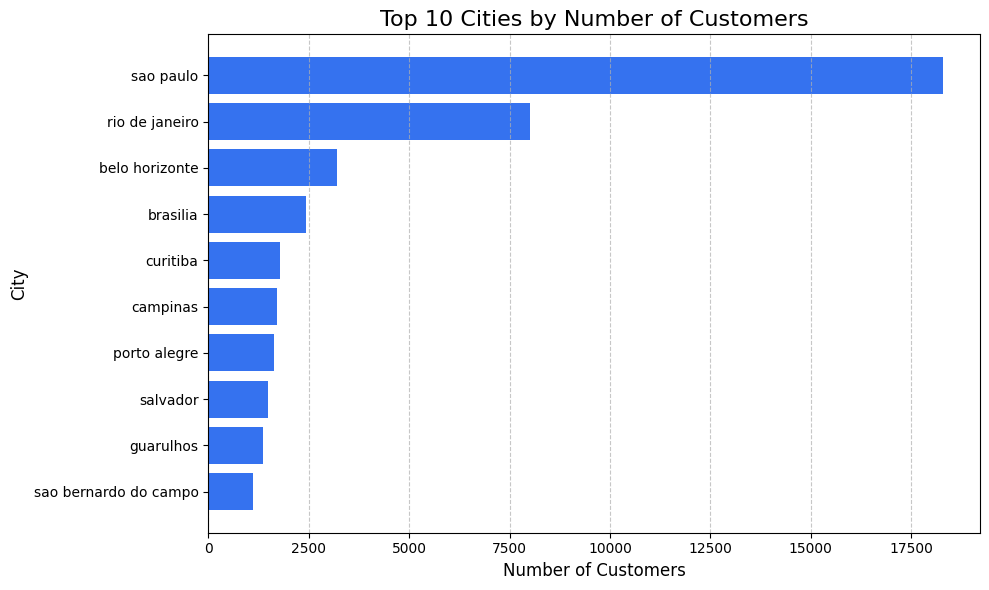

In [66]:
# Visualisasi jumlah pelanggan berdasarkan City (Top 10)
top_10_cities = customer_by_city.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_cities['customer_city'], top_10_cities['customer_count'], color='#3572EF')

# Menambahkan judul dan label
plt.title('Top 10 Cities by Number of Customers', fontsize=16)
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.gca().invert_yaxis()  # Membalikkan sumbu y agar kota dengan pelanggan terbanyak berada di atas
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()

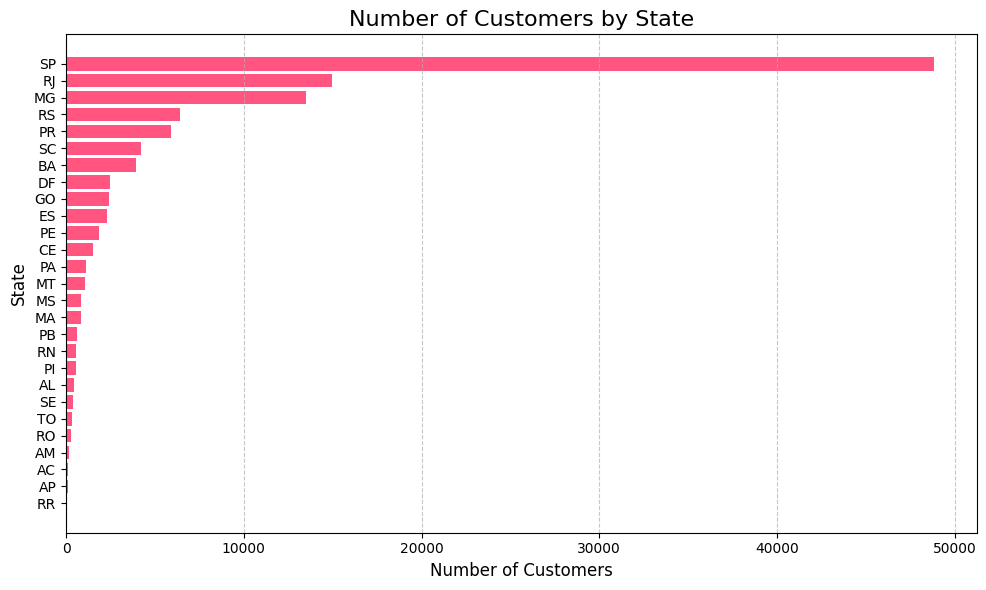

In [67]:
# Visualisasi jumlah pelanggan berdasarkan State
plt.figure(figsize=(10, 6))
plt.barh(customer_by_state['customer_state'], customer_by_state['customer_count'], color='#FF5580')

# Menambahkan judul dan label
plt.title('Number of Customers by State', fontsize=16)
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()

**Insight**
- Negara Bagian (state) dengan jumlah customer terbanyak adalah: SP (São Paulo), RJ (Rio de Janeiro), MG (Minas Gerais), RS (Rio Grande do Sul), dan PR (Paraná)
- Sedangkan top 10 kota/city dengan jumlah customer terbanyak adalah sao paulo, Rio de Janeiro, belo horizonte, brasilia, curitiba, campinas, porto alegre, salvador, gaurulhos, dan sao bernando do campo

### Pertanyaan 5: Pada pukul berapa customers paling banyak melakukan order?

In [68]:
# Ekstrak jam
all_data_df['order_hour'] = all_data_df['order_purchase_timestamp'].dt.hour
# Menghitung jumlah order per jam
hourly_order_counts = all_data_df['order_hour'].value_counts().sort_index()

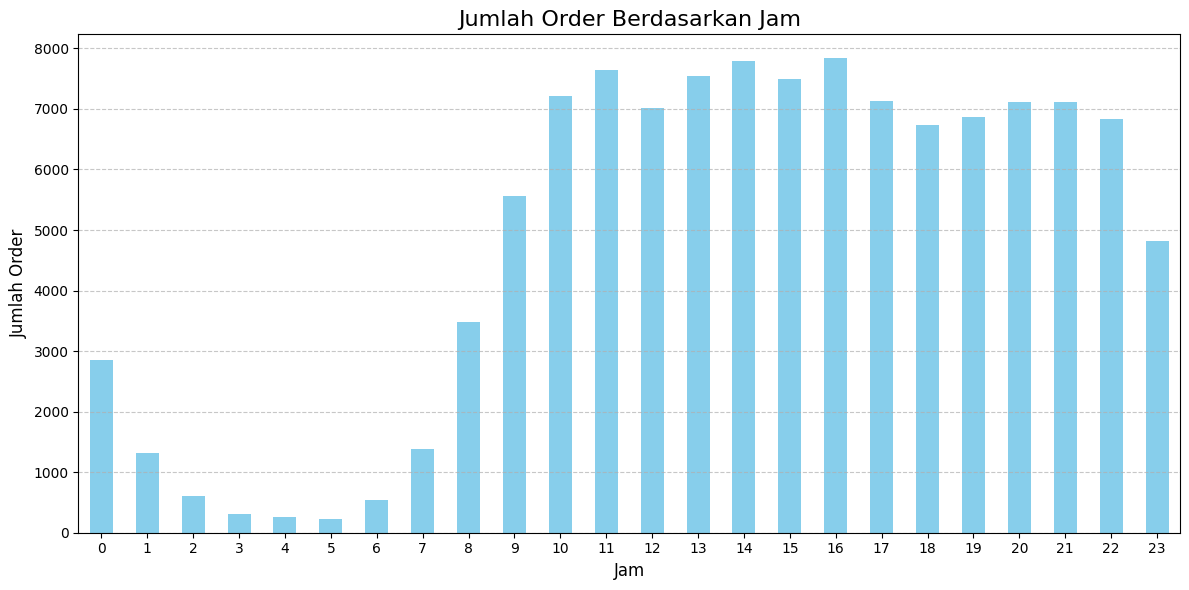

In [69]:
# Membuat visualisasi dengan bar chart
plt.figure(figsize=(12, 6))
hourly_order_counts.plot(kind='bar', color='skyblue')

# Memberikan judul dan label sumbu
plt.title('Jumlah Order Berdasarkan Jam', fontsize=16)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Jumlah Order', fontsize=12)

# Menambahkan grid untuk memudahkan pembacaan
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.xticks(rotation=0)  # Memutar label x-axis agar lebih mudah dibaca
plt.tight_layout()
plt.show()

Berdasarkan visualisasi data diatas, dapat diketahui jika waktu yang paling sering terjadi proses pemesanan oleh customer adalah pukul 16.00 sore. Pada rentang waktu 11.00-16.00 banyak orderan yang masuk di e-commerce. Berdasarkan data tersebut maka perusahaan dapat memaksimalkan sumber daya perusahaan dan mempersiapkan segala hal dengan baik di waktu-waktu padat orederan masuk.

### Pertanyaan 6: Bagaimana pengaruh antara harga barang dengan biaya pengiriman barang? apakah product dengan harga mahal memiliki biaya pengiriman yang mahal juga?

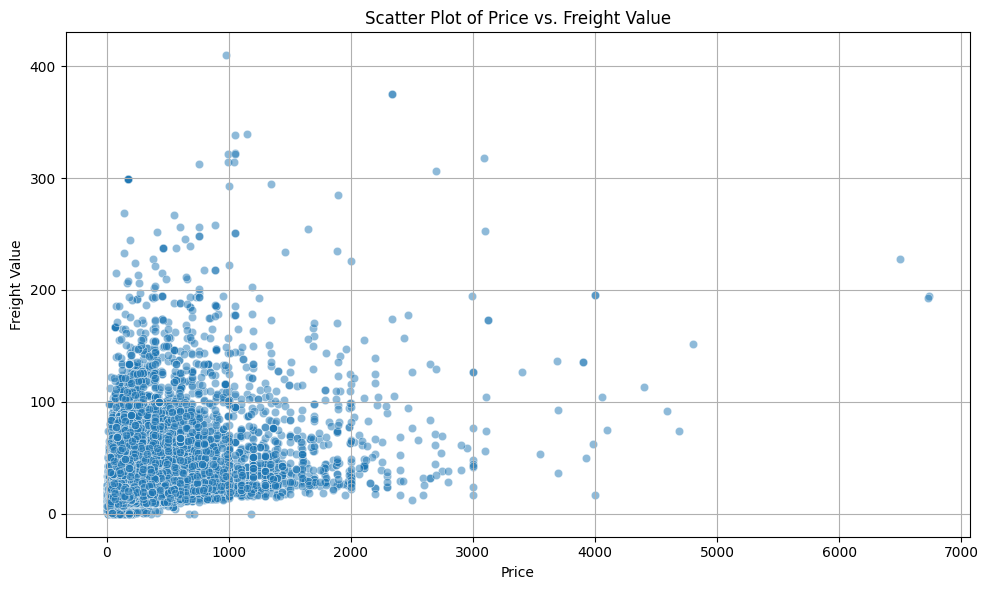

In [70]:
# Membuat scatter plot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=all_data_df, x='price', y='freight_value', alpha=0.5)
plt.title('Scatter Plot of Price vs. Freight Value')
plt.xlabel('Price')
plt.ylabel('Freight Value')
plt.grid(True)
plt.tight_layout()
plt.show()

Berdasarkan scatter plot diatas, terdapat korelasi positif antara harga dan nilai pengiriman. Ini menunjukkan bahwa item dengan harga lebih tinggi cenderung memiliki biaya pengiriman yang lebih tinggi. Hal ini bisa disebabkan oleh ukuran atau berat item yang lebih besar, serta jarak pengiriman yang lebih jauh.
Terlihat adanya pengelompokan data di beberapa area spesifik dalam grafik. 
- Cluster Harga Rendah dan Pengiriman Rendah: Mengindikasikan item yang lebih kecil dan lebih murah dengan biaya pengiriman yang rendah. Ini bisa berarti produk-produk seperti aksesoris atau barang sehari-hari.
- Cluster Harga Tinggi dan Pengiriman Tinggi: Menunjukkan item yang lebih mahal, seperti barang elektronik atau furnitur, yang juga biasanya memerlukan biaya pengiriman lebih tinggi.

## Analisis Lanjutan (RFM)

RFM (Recency, Frequency, Monetary) adalah teknik analisis pelanggan yang bertujuan untuk mengelompokkan pelanggan berdasarkan perilaku mereka dalam berinteraksi dengan bisnis. Teknik ini didasarkan pada tiga metrik utama:
- Recency (R): Mengukur seberapa baru (recent) pelanggan melakukan pembelian terakhirnya. Semakin kecil nilainya, semakin dekat waktu pembeliannya dengan hari ini, yang menunjukkan bahwa pelanggan ini aktif melakukan pembelian di e-commerce.
- Frequency (F): Mengukur seberapa sering pelanggan melakukan pembelian selama periode tertentu. Pelanggan yang sering melakukan pembelian cenderung lebih loyal dan bernilai tinggi bagi perusahaan.
- Monetary (M): Mengukur total nilai pembelian yang dihasilkan pelanggan. Pelanggan yang menghasilkan nilai transaksi tinggi dianggap lebih berharga bagi bisnis.

Analisis RFM dilakukan di project ini untuk menjawab beberapa pertanyaan bisnis yang sudah di tetapkan sebelumnya. 

In [71]:
# Create RFM DataFrame by grouping by 'customer_unique_id'
rfm_df = all_data_df.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max",  # Use the latest order date for Recency
    "order_id": "nunique",              # Count unique orders for Frequency
    "price": "sum"                      # Sum of the total price for Monetary
})

# Rename columns
rfm_df.columns = ["customer_unique_id", "max_order_timestamp", "frequency", "monetary"]

# Calculate Recency
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date  # Convert to date only (no time)
recent_date = all_data_df["order_purchase_timestamp"].dt.date.max()       # Find the most recent purchase date in the dataset
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)  # Calculate recency in days

# Drop the 'max_order_timestamp' column as it's no longer needed
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

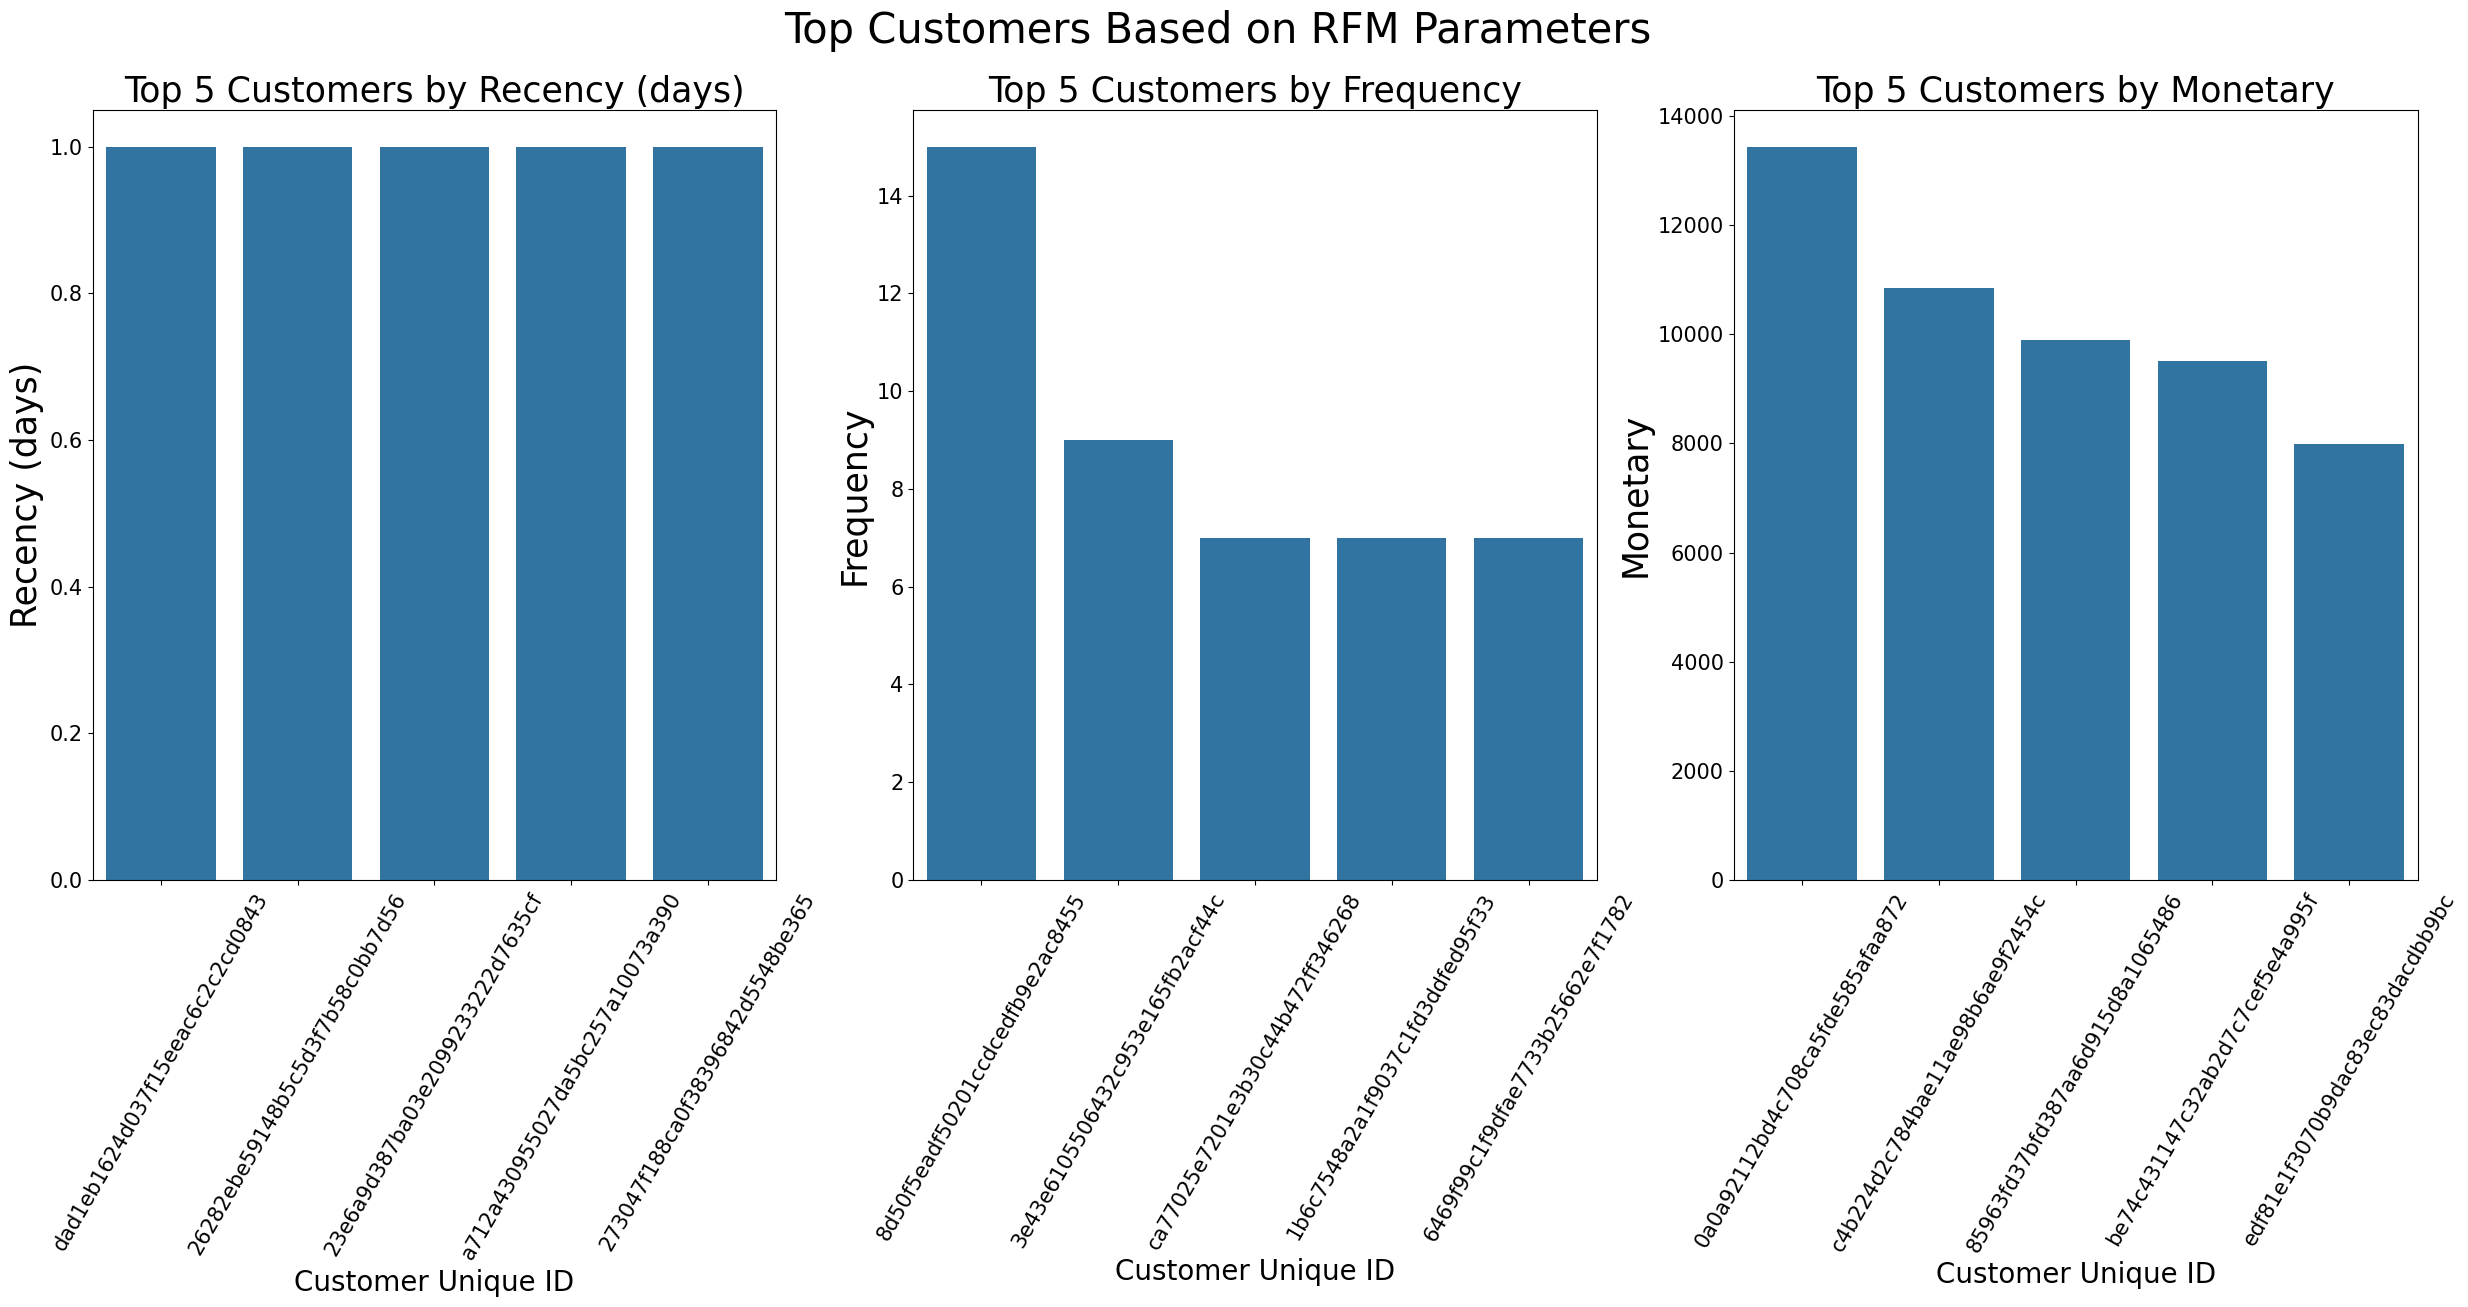

In [72]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

# Recency Barplot (Hanya pelanggan dengan recency > 0)
recency_filtered = rfm_df[rfm_df['recency'] > 0]  # Memfilter pelanggan dengan recency > 0
sns.barplot(y="recency", x="customer_unique_id", data=recency_filtered.sort_values(by="recency", ascending=True).head(5), ax=ax[0])
ax[0].set_title("Top 5 Customers by Recency (days)", fontsize=25)
ax[0].set_xlabel("Customer Unique ID", fontsize=20)  # Menambahkan label x
ax[0].set_ylabel("Recency (days)", fontsize=25)      # Menambahkan label y
ax[0].tick_params(axis='x', labelsize=15, rotation=60)
ax[0].tick_params(axis='y', labelsize=15)             # Menambah ukuran font label sumbu y

# Frequency Barplot
sns.barplot(y="frequency", x="customer_unique_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), ax=ax[1])
ax[1].set_title("Top 5 Customers by Frequency", fontsize=25)
ax[1].set_xlabel("Customer Unique ID", fontsize=20)  # Menambahkan label x
ax[1].set_ylabel("Frequency", fontsize=25)            # Menambahkan label y
ax[1].tick_params(axis='x', labelsize=15, rotation=60)
ax[1].tick_params(axis='y', labelsize=15)             # Menambah ukuran font label sumbu y

# Monetary Barplot
sns.barplot(y="monetary", x="customer_unique_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), ax=ax[2])
ax[2].set_title("Top 5 Customers by Monetary", fontsize=25)
ax[2].set_xlabel("Customer Unique ID", fontsize=20)  # Menambahkan label x
ax[2].set_ylabel("Monetary", fontsize=25)            # Menambahkan label y
ax[2].tick_params(axis='x', labelsize=15, rotation=60)
ax[2].tick_params(axis='y', labelsize=15)             # Menambah ukuran font label sumbu y

# Display the plots
plt.suptitle("Top Customers Based on RFM Parameters", fontsize=30)
plt.show()

## Conclusion

- Data menunjukkan bahwa dari awal 2018, jumlah pesanan cenderung stabil setelah fluktuasi signifikan di akhir 2017, dengan pertumbuhan pendapatan yang sejalan dengan banyaknya pesanan. Puncak pendapatan terjadi pada Oktober 2017, diikuti oleh penurunan tajam yang mencerminkan tantangan pasar. Meskipun pendapatan relatif stabil pada 2018, adanya penurunan di akhir periode menunjukkan potensi tantangan eksternal yang perlu diperhatikan untuk memastikan keberlanjutan pertumbuhan di masa mendatang.
- Dari hasil visualisasi mengenai Payment Type, terlihat bahwa kartu kredit menjadi metode pembayaran yang paling dominan, mencerminkan kenyamanan pelanggan dengan layanan perbankan modern. Boleto, sebagai metode pembayaran kedua terpopuler, menunjukkan adanya preferensi untuk transaksi offline di kalangan segmen masyarakat tertentu yang mungkin belum terlayani sepenuhnya oleh perbankan digital. Selain itu, penggunaan voucher yang signifikan mengindikasikan efektivitas strategi promosi dalam mendorong pembelian. Keseluruhan, temuan ini memberikan wawasan berharga untuk mengembangkan program loyalitas dan inisiatif pendidikan keuangan guna meningkatkan pengalaman pelanggan.
- Kategori produk terlaris didominasi oleh Bed, Bath, and Table dengan lebih dari 13.000 pesanan, mencerminkan tingginya permintaan terhadap produk rumah tangga. Kategori Health and Beauty juga menunjukkan minat kuat dengan sekitar 8.000 pesanan, sedangkan Sports and Leisure, Furniture and Decor, serta Computers and Accessories menambah daftar produk populer yang terkait gaya hidup aktif dan teknologi. Sebaliknya, kategori dengan pesanan paling sedikit, seperti Security and Services serta Fashion Children's Clothes, menunjukkan minat rendah pada produk keamanan dan fashion anak-anak. Selain itu, penurunan penjualan dalam kategori media dan hiburan fisik, seperti CDs dan DVDs, mencerminkan pergeseran konsumen menuju media digital, mengindikasikan perlunya penyesuaian strategi pemasaran untuk kategori tersebut.
- Negara Bagian (state) dengan jumlah customer terbanyak adalah: SP (São Paulo), RJ (Rio de Janeiro), MG (Minas Gerais), RS (Rio Grande do Sul), dan PR (Paraná). Sedangkan top 10 kota/city dengan jumlah customer terbanyak adalah sao paulo, Rio de Janeiro, belo horizonte, brasilia, curitiba, campinas, porto alegre, salvador, gaurulhos, dan sao bernando do campo
- Dari analisis data, terungkap bahwa waktu puncak pemesanan oleh pelanggan terjadi pada pukul 16.00 sore, dengan rentang waktu antara 11.00 hingga 21.00 menjadi periode kritis yang menyaksikan lonjakan signifikan dalam jumlah orderan di e-commerce. Menyadari tren ini, perusahaan dapat mengambil langkah strategis untuk memaksimalkan sumber daya dan mempersiapkan segala kebutuhan secara optimal selama periode sibuk tersebut.
- Berdasarkan analisis scatter plot yang ditunjukkan, terlihat adanya korelasi positif antara harga dan biaya pengiriman. Temuan ini mengindikasikan bahwa item dengan harga yang lebih tinggi cenderung memiliki biaya pengiriman yang lebih tinggi pula. Fenomena ini dapat dijelaskan oleh beberapa faktor. Pertama, item dengan harga lebih tinggi sering kali memiliki ukuran atau berat yang lebih besar, yang secara langsung mempengaruhi biaya pengiriman karena jasa kurir biasanya mengenakan tarif berdasarkan berat atau dimensi paket. Kedua, jarak pengiriman juga berperan penting; produk yang lebih mahal mungkin berasal dari lokasi yang lebih jauh, sehingga memerlukan biaya transportasi yang lebih tinggi.